<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Using-scikit-COSMO-selectors-with-scikit-learn-pipelines" data-toc-modified-id="Using-scikit-COSMO-selectors-with-scikit-learn-pipelines-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using scikit-COSMO selectors with scikit-learn pipelines</a></span><ul class="toc-item"><li><span><a href="#Simple-integration-of-scikit-COSMO-selectors" data-toc-modified-id="Simple-integration-of-scikit-COSMO-selectors-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simple integration of scikit-COSMO selectors</a></span></li><li><span><a href="#Stacking-selectors-one-after-another" data-toc-modified-id="Stacking-selectors-one-after-another-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Stacking selectors one after another</a></span></li></ul></li></ul></div>

Using scikit-COSMO selectors with scikit-learn pipelines
========================================================

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from skcosmo.feature_selection import FPS, CUR

## Simple integration of scikit-COSMO selectors
This example shows how to use FPS to subselect features before training a RidgeCV.

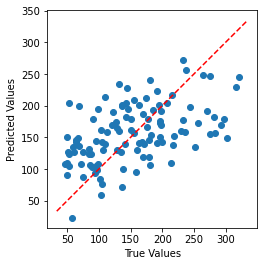

In [2]:
scaler = StandardScaler()
selector = FPS(n_to_select=4)
ridge = RidgeCV(cv=2, alphas=np.logspace(-8, 2, 10))

X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([("scaler", scaler), ("selector", selector), ("ridge", ridge)])
pipe.fit(X_train.copy(), y_train.copy())

plt.scatter(y_test, pipe.predict(X_test))
plt.gca().set_aspect("equal")
plt.plot(plt.xlim(), plt.xlim(), "r--")
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


## Stacking selectors one after another

This example shows how to use an FPS, then CUR selector
to subselect features before training a RidgeCV.

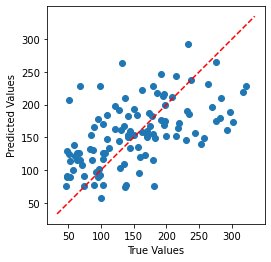

In [3]:
scaler = StandardScaler()
fps = FPS(n_to_select=8)
cur = CUR(n_to_select=4)
ridge = RidgeCV(cv=2, alphas=np.logspace(-8, 2, 10))

X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline(
    [("scaler", scaler), ("selector1", fps), ("selector2", cur), ("ridge", ridge)]
)
pipe.fit(X_train.copy(), y_train.copy())

plt.scatter(y_test, pipe.predict(X_test))
plt.gca().set_aspect("equal")
plt.plot(plt.xlim(), plt.xlim(), "r--")
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()